In [6]:
# ### DOWNLOAD ICESAT-2 DATA
# PATHS = c(
# "boreal_agb_202302061675670992_2952.tif",
# "boreal_agb_202302061675670680_2867.tif",
# "boreal_agb_202302061675668761_2868.tif",
# "boreal_agb_202302061675664058_2788.tif",
# "boreal_agb_202302061675663480_1955.tif",
# "boreal_agb_202302061675663035_2787.tif",
# "boreal_agb_202302061675662882_2707.tif",
# "boreal_agb_202302061675662860_2708.tif",
# "boreal_agb_202302061675660448_2024.tif",
# "boreal_agb_202302061675659857_1954.tif",
# "boreal_agb_202302061675659541_2094.tif")

# ORNL_username <- 'nhunka'
# ORNL_password <- 'Boreal_tiles1'
# DOWNLOAD_FOLDER = "/projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/"

# for (i in 1:length(PATHS)){
#     DOWNLOAD_LOCATION <- paste0(DOWNLOAD_FOLDER,basename(PATHS[i]))
#     if (!file.exists(DOWNLOAD_LOCATION)){
#         PATH_i = paste("wget --user",ORNL_username, "--password ",ORNL_password, paste0("https://daac.ornl.gov/daacdata/above/Boreal_AGB_Density_ICESat2/data/",basename(PATHS[i])), "-O", DOWNLOAD_LOCATION)
#         print(paste("Downloading...",DOWNLOAD_LOCATION))
#         print(PATH_i)
#         system(PATH_i)
# }
# }

[1] "Downloading... /projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/boreal_agb_202302061675670992_2952.tif"
[1] "wget --user nhunka --password  Boreal_tiles1 https://daac.ornl.gov/daacdata/above/Boreal_AGB_Density_ICESat2/data/boreal_agb_202302061675670992_2952.tif -O /projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/boreal_agb_202302061675670992_2952.tif"
[1] "Downloading... /projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/boreal_agb_202302061675670680_2867.tif"
[1] "wget --user nhunka --password  Boreal_tiles1 https://daac.ornl.gov/daacdata/above/Boreal_AGB_Density_ICESat2/data/boreal_agb_202302061675670680_2867.tif -O /projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/boreal_agb_202302061675670680_2867.tif"
[1] "Downloading... /projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/boreal_agb_202302061675668761_2868.tif"
[1] "wget --user nhunka --password  Boreal_tiles1 https://

In [5]:
import s3fs
import os

DOWNLOAD_FOLDER = "/projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_files/"
list = ["s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/14/45/53/581150/boreal_agb_2020_202407171721252667_0002093.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/11/47/273906/boreal_agb_2020_202407171721254217_0002023.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/14/06/396535/boreal_agb_2020_202407171721254333_0002867.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/16/31/132315/boreal_agb_2020_202407171721254498_0002094.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/19/30/772176/boreal_agb_2020_202407171721254671_0002024.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/28/09/128143/boreal_agb_2020_202407171721255189_0001955.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/40/22/201905/boreal_agb_2020_202407171721255911_0002788.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/46/32/268143/boreal_agb_2020_202407171721256279_0002708.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/15/46/39/917014/boreal_agb_2020_202407171721256285_0002787.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/16/06/16/852593/boreal_agb_2020_202407171721257466_0002786.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/16/27/03/976744/boreal_agb_2020_202407171721258706_0002707.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/16/27/24/692311/boreal_agb_2020_202407171721258736_0001954.tif",
"s3://maap-ops-workspace/lduncanson/dps_outsput/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/16/58/01/627651/boreal_agb_2020_202407171721260574_0002952.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/17/20/58/787642/boreal_agb_2020_202407171721261957_0002166.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/17/17/36/29/821669/boreal_agb_2020_202407171721262874_0002868.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/19/06/10/45/985168/boreal_agb_2020_202407191721394557_0001953.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/19/06/17/08/177877/boreal_agb_2020_202407191721394947_0002092.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/AGB_H30_2020/Version2_SD/2024/07/19/06/45/51/231469/boreal_agb_2020_202407191721396662_0002022.tif"]

DOWNLOAD_FOLDER = "/projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/MNG/BOREAL_heights/"
if not os.path.exists(DOWNLOAD_FOLDER): os.mkdir(DOWNLOAD_FOLDER)
list = ["s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/21/32/47/186886/boreal_ht_2020_202407251721968278_0002166.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/21/53/43/785836/boreal_ht_2020_202407251721969521_0002952.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/22/15/56/144922/boreal_ht_2020_202407251721970840_0002787.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/22/30/52/545185/boreal_ht_2020_202407251721971751_0002024.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/22/32/26/843565/boreal_ht_2020_202407251721971862_0002022.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/22/45/39/383067/boreal_ht_2020_202407251721972655_0001953.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/22/53/13/131734/boreal_ht_2020_202407251721973113_0002092.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/04/17/463310/boreal_ht_2020_202407251721973748_0002867.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/07/39/011539/boreal_ht_2020_202407251721973941_0002788.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/10/17/738194/boreal_ht_2020_202407251721974120_0001955.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/10/47/840882/boreal_ht_2020_202407251721974136_0002868.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/28/21/592890/boreal_ht_2020_202407251721975203_0002023.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/41/35/433171/boreal_ht_2020_202407251721976006_0002093.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/41/43/627070/boreal_ht_2020_202407251721976009_0001954.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/25/23/44/33/660368/boreal_ht_2020_202407251721976162_0002707.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/26/00/08/33/294345/boreal_ht_2020_202407261721977605_0002708.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/26/00/25/20/759122/boreal_ht_2020_202407261721978619_0002094.tif",
"s3://maap-ops-workspace/lduncanson/dps_output/run_boreal_biomass_map/boreal_agb_2024_v6/Ht_H30_2020/Version2_SD/2024/07/26/00/29/17/222050/boreal_ht_2020_202407261721978844_0002786.tif"]
s3 = s3fs.S3FileSystem(anon=False)
for file in list:
    s3.download(file, DOWNLOAD_FOLDER)

/tmp/ipykernel_3495/791616042.py:15: RuntimeWarning: invalid value encountered in divide
  zi = zi / counts


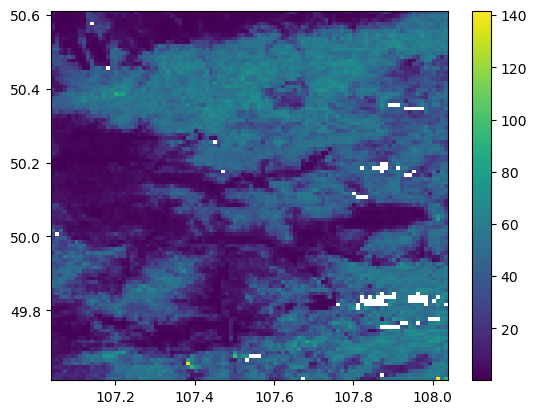

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

L2A = pd.read_csv("/projects/my-public-bucket/Data/NASA_CMS_2023/MONGOLIA/GRID/fid_1_MON_L2A.csv")
x = L2A["lon_lowestmode.x"]
y = L2A["lat_lowestmode.x"]
z = L2A.rh98
n = 100 # n x n is the size of the output raster

zi, yi, xi = np.histogram2d(y, x, bins=(n,n), weights=z)
counts, _, _ = np.histogram2d(y, x, bins=(n,n))

zi = zi / counts
zi = np.ma.masked_invalid(zi)

fig, ax = plt.subplots()
ax.pcolormesh(xi, yi, zi) ## edgecolors='black'
scat = ax.scatter(x, y, c=z, s=0)
fig.colorbar(scat)
ax.margins(0.05)

plt.show()